# Illustration of the Definitions used in Level-Crossing Analysis of a Queueing Process

Nicky van Foreest

We use simulation to analyze the relation 
\begin{equation}
  \lambda(n) p(n) = \mu(n+1)p(n+1)
\end{equation}
derived by level crossing arguments applied to queueing systems in which jobs arrive and depart in single quantities (i.e., no batch arrivals). To define these quantities we need some extra notation. Below we also compute the variables with simulation. 

We start with a given set of arrival epochs $\{A_k\}$ and departure epochs $\{D_k\}$. 
Let $A(t)$ be the total number of jobs arrived up to time, i.e., $A(t)=\max\{k : A_k \leq t\}$, and $D(t)$ be the number departed up, i.e., $D(t)=\max\{k: D_k \leq t\}$. Then $L(t) = A(t)-D(t)$ is the number of jobs in the system, assuming the system starts out empty. Define
\begin{align}
  A(n,t) &= \sum_{k=1}^\infty \mathbf{1}\{A_k\leq t, L(A_k-)=n\}, \\
  D(n,t) &= \sum_{k=1}^\infty \mathbf{1}\{D_k\leq t, L(D_k)=n\}, 
\end{align}
respectively, as the number of arrivals up to time $t$ that see $n$ jobs in the system upon arrival, and as the number of departures that leave $n$ behind. Next,  let
\begin{equation}
  Y(n,t)=\int_0^t \mathbf{1}\{L(s)=n\}d\,s,
\end{equation}
denote the amount of time the system contains $n$ jobs. Finally, define
\begin{align}
  p(n) &= \lim_{t \to \in} \frac{Y(n,t)}{t}&
  \lambda(n) &= \lim_{t \to \in} \frac{A(n,t)}{Y(n,t)}&
  \mu(n) &= \lim_{t \to \in} \frac{D(n,t)}{Y(n+1,t)}.
\end{align}

## Simulation Code and Example

Standard imports to facility the computations and the plotting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
plt.style.use('ggplot')

We assume that the arrival times $\{A_k\}$ and departure $\{D_k\}$ of jobs are given. 

In [2]:
Ak = np.array([2, 3, 8, 17, 18])
Dk = np.array([4, 9, 12, 23])

Based on $\{A_k\}$ and $\{D_k\}$ we compute the sorted set of  epochs $T$ at which either an arrival or a departure occurs. We set $T_0=0$, and $T_1, T_2, \ldots$ correspond to arrival and departure epochs.

In [3]:
def epochs(Ak, Dk):
    T = np.zeros(1+len(Ak)+len(Dk))
    T[1:] = np.sort(np.concatenate((Ak, Dk)))
    return T

T = epochs(Ak, Dk)
print(T)


[ 0.  2.  3.  4.  8.  9. 12. 17. 18. 23.]


The \emph{durations} are the length of the intervals $[T_k, T_{k+1})$ for $k=0, 1, \ldots$. 

In [4]:
def durations(T):
    return np.diff(T)

dur = durations(T)
print(dur)


[2. 1. 1. 4. 1. 3. 5. 1. 5.]


Next we \emph{mark the indices} of the epochs $T$ that correspond to arrivals.

In [5]:
def mark_arrival_epochs(Ak, T):
    return 1*np.array(np.in1d(T, Ak))

A = mark_arrival_epochs(Ak, T)
print(A)

[0 1 1 0 1 0 0 1 1 0]


Lets check. Select the indices of $T$ where $A=1$. 

In [6]:
arrival_epochs = T[np.where(A)]

Here we \emph{mark the indices} of the epochs $T$ that correspond to departures.

In [7]:
def mark_departure_epochs(Dk, T):
    return 1*np.array(np.in1d(T, Dk))

D = mark_arrival_epochs(Dk, T)
print(D)


[0 0 0 1 0 1 1 0 0 1]


Next, we compute the queue length.

Text(0, 0.5, 'L')

<Figure size 432x288 with 0 Axes>

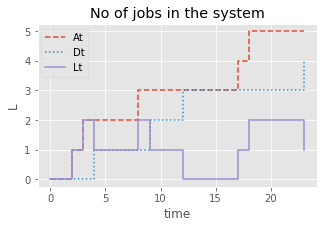

In [8]:
At = A.cumsum()
Dt = D.cumsum()

def queue_length(At, Dt):
    return At-Dt

Lt = queue_length(At, Dt)

plt.clf()
plt.figure(figsize=(5, 3))
# Use TeX fonts
# rc("text", usetex=True)

plt.plot(T, At, linestyle='--', drawstyle='steps-post', label="At")
plt.plot(T, Dt, linestyle=':', drawstyle='steps-post', label="Dt")
plt.plot(T, Lt, drawstyle='steps-post', label="Lt")
plt.legend(bbox_to_anchor=(0.2, 1))
plt.title("No of jobs in the system")
plt.xlabel("time")
plt.ylabel("L")
# plt.savefig("queue.pdf", bbox_inches="tight")


Now we compute $Y(n,t)$. This is a bit difficult. We first mark the points in time $Z$ where $L(T_k)=n$, in other words, if $L(T_k)=n$, (so that $Z(T_k)=1$), then $L(s)=n$ for $s\in [T_k, T_{k+1})$. To get $Y(n,t)$, we set $Y(n,T_{k+1}) = Y(n,T_k) + Z(T_k)\cdot(T_{k+1}-T_k)$. Below we only use $Y = Z(T_k)\cdot(T_{k+1}-T_k)$ as a dummy variable to prevent doing two steps at the same time. 

Text(0, 0.5, 'Y')

<Figure size 432x288 with 0 Axes>

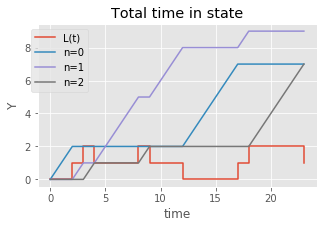

In [9]:
def Ynt(L, durations, n):
    Y = np.zeros(len(L))
    Z = np.zeros_like(L)
    Z[np.where(L == n)] = 1
    Y[1:] = Z[:-1]*durations
    return Y.cumsum()

Y0t = Ynt(Lt, dur, 0)
Y1t = Ynt(Lt, dur, 1)
Y2t = Ynt(Lt, dur, 2)

plt.clf()
plt.figure(figsize=(5, 3))
plt.plot(T, Lt, drawstyle='steps-post', label="L(t)")
plt.plot(T, Y0t, label="n=0")
plt.plot(T, Y1t, label="n=1")
plt.plot(T, Y2t, label="n=2")
plt.legend(bbox_to_anchor=(0.2, 1))
plt.title("Total time in state")
plt.xlabel("time")
plt.ylabel("Y")
# plt.savefig("Ynt.pdf", bbox_inches="tight")


Finally, we compute $A(n,t)$ and $D(n,t)$. Note that our $Lt$ is right-continuous. Hence $L(A_k-)=L(A_k)-1$. We first select all arrival epochs such that $L(A_k)=n+1$ (hence $L(A_k-)=n$. Recall that $A$ markes the epochs of $T$ at which arrivals occured, and likewise $D$ markes the departure epochs. 

Text(0, 0.5, 'A')

<Figure size 432x288 with 0 Axes>

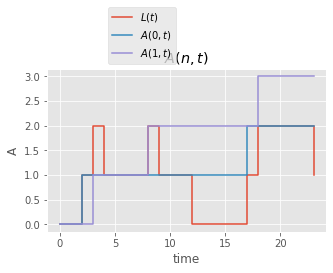

In [10]:
def Ant(L, arrival_epochs, n):
    a = np.zeros_like(L)
    a[np.where(arrival_epochs*(L == n+1))] = 1
    return a.cumsum()

def Dnt(L, departure_epochs, n):
    d = np.zeros_like(L)
    d[np.where(departure_epochs*(L == n))] = 1
    return d.cumsum()

A0t = Ant(Lt, A, 0)
A1t = Ant(Lt, A, 1)
A2t = Ant(Lt, A, 2)

plt.clf()
plt.figure(figsize=(5, 3))
plt.plot(T, Lt, drawstyle='steps-post', label="$L(t)$")
plt.plot(T, A0t, drawstyle='steps-post', label="$A(0,t)$")
plt.plot(T, A1t, drawstyle='steps-post', label="$A(1,t)$")
plt.legend(bbox_to_anchor=(0.2, 1))
plt.title("$A(n,t)$")
plt.xlabel("time")
plt.ylabel("A")

## $D/D/1$ queue

Let us see what we get for the $D/D/1$ queue. First we need to compute $\{A_k\}$ and $\{D_k\}$  from a set of interarrival times $\{X_k\}$ and service times $\{S_k\}$. For this we use the recursion
\begin{align}
A_k &= A_{k-1}+X_k, \\
  D_k &= \max\{A_, D_{k-1}\} + S_k.
\end{align}

In [11]:
def recursion(Ak, Sk):
    Dk = np.zeros_like(Ak)
    D = 0
    for k, A in enumerate(Ak):
        D = max(A, D) + Sk[k]
        Dk[k]=D
    return Dk

In [12]:
def compute_rates(Ak, Dk, n):
    epochs_all = epochs(Ak, Dk)
    durations_all = durations(epochs_all)
    arrival_epochs = mark_arrival_epochs(Ak, epochs_all)
    At = arrival_epochs.cumsum()
    departure_epochs = mark_departure_epochs(Dk, epochs_all)
    Dt = departure_epochs.cumsum()
    Lt = queue_length(At, Dt)

    Yt = np.zeros(n) 
    for k in range(n): 
        Yt[k] = Ynt(Lt, durations_all, k)[-1]

    An = np.zeros(n)
    for k in range(n):
        An[k] = Ant(Lt, arrival_epochs, k)[-1]

    Dn = np.zeros(n)
    for k in range(n):
        Dn[k] = Dnt(Lt, departure_epochs, k)[-1]

    #print(Dn)

    p = np.zeros(n)
    for k in range(n):
        p[k] = Yt[k]/epochs_all[-1]

    print("p: {}\n".format(p))

    labda_ = np.zeros(n)
    for k in range(n):
        labda_[k] = An[k]/Yt[k]

    print("labda: {}\n".format(labda_))

    mu_ = np.zeros(n)
    for k in range(n-1):
        mu_[k+1] = Dn[k]/Yt[k+1]

    print("mu: {}\n".format(mu_))

    for k in range(n-1):
        print("level {}, up crossing rate: {}\n".format(k, p[k]*labda_[k]))
        print("level {}, down crossing rate: {}\n".format(k, p[k+1]*mu_[k+1]))

In [13]:
def dd1():
    num = 100
    Xk = np.ones(num)
    Sk = 0.5*np.ones(num)
    Ak = Xk.cumsum()
    Dk = recursion(Ak, Sk)
    compute_rates(Ak, Dk, 2)

dd1()


p: [0.50248756 0.49751244]

labda: [1.98019802 0.        ]

mu: [0. 2.]

level 0, up crossing rate: 0.9950248756218907

level 0, down crossing rate: 0.9950248756218906



This all seems in accordance with expectation.

## Analysis of $M/M/1$ Queue

In [14]:
def mm1():
    labda, mu = 0.8, 1
    num = 100000
    rho = labda/mu
    print("p(0), theoretical: {}\n".format(1-rho))
    
    Xk = np.random.exponential(1/labda, num)
    Sk = np.random.exponential(1/mu, num)
    Ak = Xk.cumsum()
    Dk = recursion(Ak, Sk)
    compute_rates(Ak, Dk, 5)

mm1()


p(0), theoretical: 0.19999999999999996

p: [0.19944405 0.15818876 0.12695574 0.10107121 0.07974076]

labda: [0.8050329  0.80499935 0.79866185 0.80386396 0.78487398]

mu: [0.         1.01498372 1.00304133 1.00320061 1.01889557]

level 0, up crossing rate: 0.16055901884395618

level 0, down crossing rate: 0.16055901884395615

level 1, up crossing rate: 0.12734185053856972

level 1, down crossing rate: 0.12734185053856972

level 2, up crossing rate: 0.10139470334959799

level 2, down crossing rate: 0.10139470334959798

level 3, up crossing rate: 0.08124750670874932

level 3, down crossing rate: 0.08124750670874933



We see that $\lambda(n)\approx \lambda$, and $\mu(n)\approx 1$, which is correct. Also $p(0)\approx 1-\rho$. The up- and down-crossing rates of each level agree. 

## Analysis of $M/D/1$ Queue

In [15]:
def md1():
    labda, mu = 0.8, 1
    num = 1000000
    
    Xk = np.random.exponential(1/labda, num)
    Sk = np.ones(num)
    Ak = Xk.cumsum()
    Dk = recursion(Ak, Sk)
    compute_rates(Ak, Dk, 15)

md1()


p: [0.20034138 0.24494065 0.18883239 0.12691321 0.08208261 0.0535521
 0.0353043  0.02317131 0.01528716 0.01009372 0.00664773 0.00435164
 0.00288655 0.00192939 0.00129935]

labda: [0.79882689 0.79795886 0.79996613 0.79712436 0.79710029 0.80894504
 0.80280032 0.80817201 0.80404405 0.80689007 0.80101384 0.80560528
 0.81889824 0.81400131 0.79883029]

mu: [0.         0.65337493 1.03505847 1.19025838 1.2324854  1.22176474
 1.22706612 1.2231634  1.22497583 1.2177425  1.22515783 1.22366002
 1.21449591 1.22514657 1.20870778]

level 0, up crossing rate: 0.1600380792325842

level 0, down crossing rate: 0.1600380792325842

level 1, up crossing rate: 0.19545256067729075

level 1, down crossing rate: 0.19545256067729075

level 2, up crossing rate: 0.1510595122115359

level 2, down crossing rate: 0.15105951221153593

level 3, up crossing rate: 0.10116561207693615

level 3, down crossing rate: 0.10116561207693615

level 4, up crossing rate: 0.06542806854846547

level 4, down crossing rate: 0.065428068

We see that $\lambda(n)\approx\lambda$, which should be the case given that the arrival process is Poisson. The service rate $\mu(n)$, however, is not constant. This is also not expected, otherwise the $M/D/1$ queue would have been an $M/M/1$ queue. Interestingly, $\mu(n)\approx 1.22$, for $n>3$. Observe that $\mu(n)>1$, which is interesting. The reason must be that job service times are 1, but the average time the queueing process stays in some state $n$ is shorter than $1$, due to arrivals.